In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/co2-emission-by-vehicles/CO2 Emissions_Canada.csv
/kaggle/input/co2-emission-by-vehicles/Data Description.csv


# Summary of Dataset

This dataset compiles information on how CO2 emissions from vehicles can vary based on different features. It was sourced from the official open data website of the Canadian Government and represents a compiled version spanning a period of 7 years.

# Goal

We will try to resolve the following questions

* Determine or test the influence of different variables on the emission of CO2.
* What are the most influencing features that affect the CO2 emission the most?
* Will there be any difference in the CO2 emissions when Fuel Consumption for City and Highway are considered separately and when their weighted variable interaction is considered?

# This Notebook will cover the following:

* Data Acquisition
* Data Preparation & Manupulation
* Exploratory Data Analysis
* Data Modelling and evaluation

If this Kernel helped you in any way, some UPVOTES would be very much appreciated

# 1. Data Acquisition

In [2]:
# Load the dataset
data = pd.read_csv("/kaggle/input/co2-emission-by-vehicles/CO2 Emissions_Canada.csv")
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [5]:
# unique value of each column
data.nunique()

Make                                  42
Model                               2053
Vehicle Class                         16
Engine Size(L)                        51
Cylinders                              8
Transmission                          27
Fuel Type                              5
Fuel Consumption City (L/100 km)     211
Fuel Consumption Hwy (L/100 km)      143
Fuel Consumption Comb (L/100 km)     181
Fuel Consumption Comb (mpg)           54
CO2 Emissions(g/km)                  331
dtype: int64

# 2. Data Preparation & Manupulation

In [6]:
# description of the data
data.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


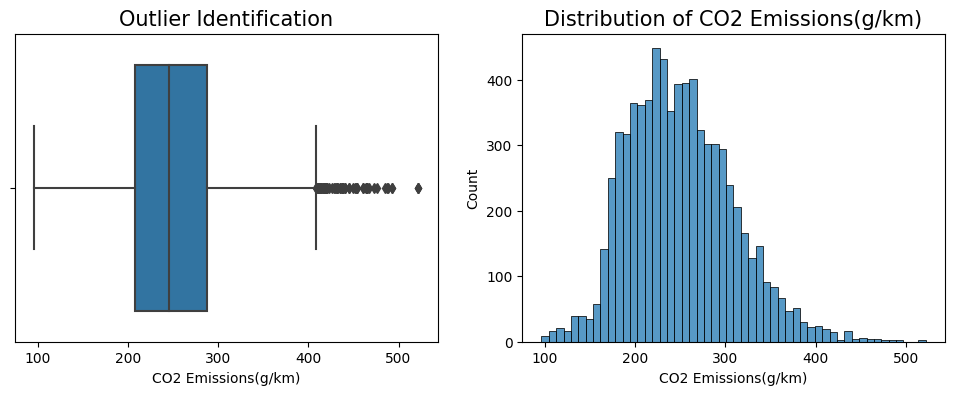

In [7]:
# checking outliers by boxplot for the outcome variable 'CO2 Emissions' and outcome variable distribution
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
sns.boxplot(x=data['CO2 Emissions(g/km)'])
plt.title('Outlier Identification', fontsize=15 )
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
sns.histplot(x=data['CO2 Emissions(g/km)'])
plt.title('Distribution of CO2 Emissions(g/km)', fontsize=15 )
plt.show()

* CO2 Emission has outliers
* Apperently CO2 emission normaly distributed with slight left skewed.
* Lets remove the outliers and check the data distribution 

In [8]:
#Defining the Quartiles for removal of outliers
Q1=data['CO2 Emissions(g/km)'].quantile(0.25)
Q3=data['CO2 Emissions(g/km)'].quantile(0.75)
IQR=Q3-Q1
lowoutlier=Q1-1.5*IQR
highoutlier=Q3+1.5*IQR
totaloutlier=((data['CO2 Emissions(g/km)']<lowoutlier)|(data['CO2 Emissions(g/km)']>highoutlier)).sum()
totaloutlier

80

In [9]:
# Removal of Outliers
data_new=data[(data['CO2 Emissions(g/km)']<highoutlier)&(data['CO2 Emissions(g/km)']>lowoutlier)]
#validating the removal of outlier
totaloutlier = ((data_new['CO2 Emissions(g/km)'] < lowoutlier) | (data_new['CO2 Emissions(g/km)'] > highoutlier)).sum()
print("Total Number of Outliers in the CO2 Emissions(g/km) are {}".format(totaloutlier))

Total Number of Outliers in the CO2 Emissions(g/km) are 0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


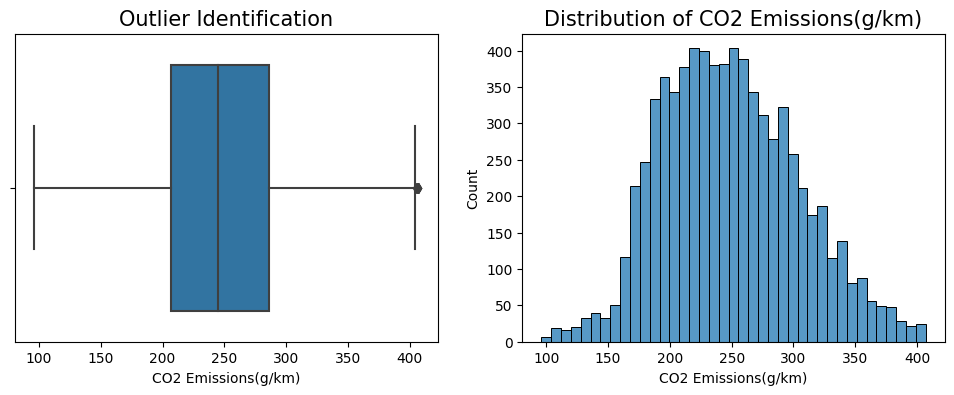

In [10]:
# checking outliers by boxplot for the outcome variable 'CO2 Emissions' and outcome variable distribution
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
sns.boxplot(x=data_new['CO2 Emissions(g/km)'])
plt.title('Outlier Identification', fontsize=15 )
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
sns.histplot(x=data_new['CO2 Emissions(g/km)'])
plt.title('Distribution of CO2 Emissions(g/km)', fontsize=15 )
plt.show()

* The above data is normally distributed.
* Lets proceed for the EDA

# 3. Exploratory Data Analysis

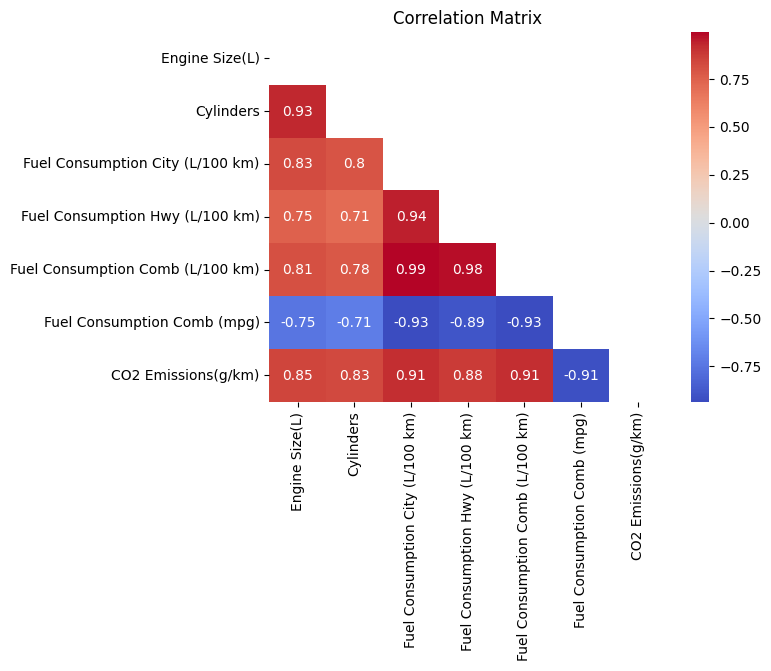

In [11]:
# lets check the correlation
# Numerical Columns
numerical_columns=data_new.select_dtypes(exclude=['object']).columns
numerical_columns
# Heatmap will show us the relationship among variables
mask=np.triu(np.ones_like(data_new[numerical_columns].corr()))
sns.heatmap(data_new[numerical_columns].corr(),cmap='coolwarm',mask=mask,annot=True)
plt.title('Correlation Matrix')
plt.show()

* All the variables is highly correlated with CO2 Emission except Fuel Consumption Comb (mpg)
* Fuel Consumption City (L/100 km) and Fuel Consumption Comb (L/100 km) affects more on CO2 emission.
* Fuel Consumption Comb (mpg) is negetively correlated with CO2 Emission

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

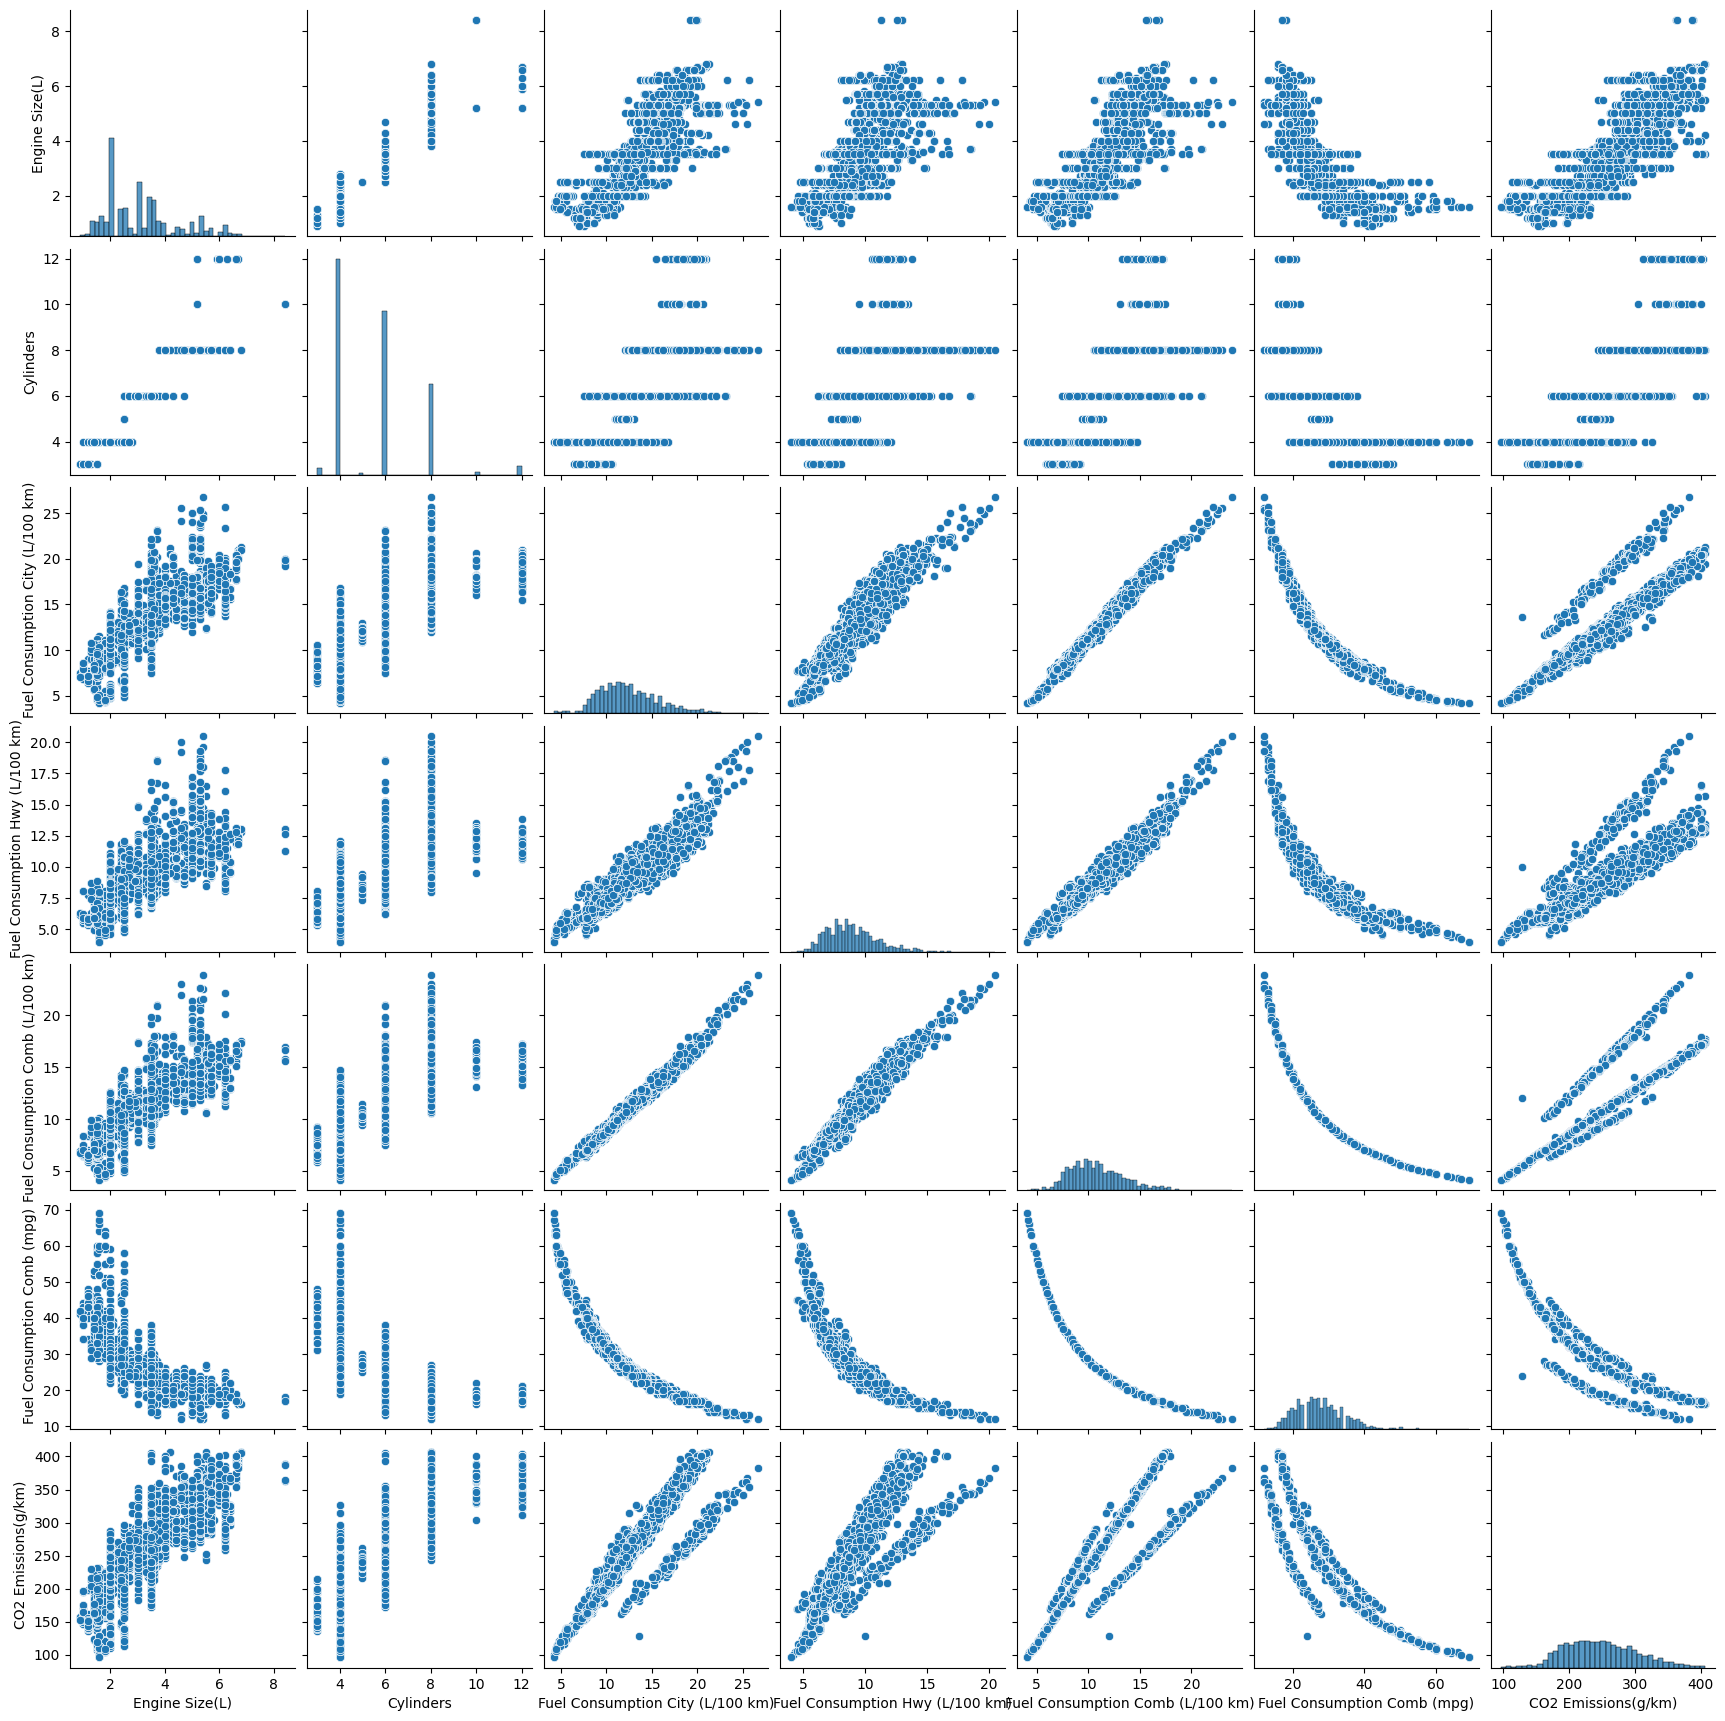

In [12]:
# Correlation
sns.pairplot(data_new[numerical_columns])

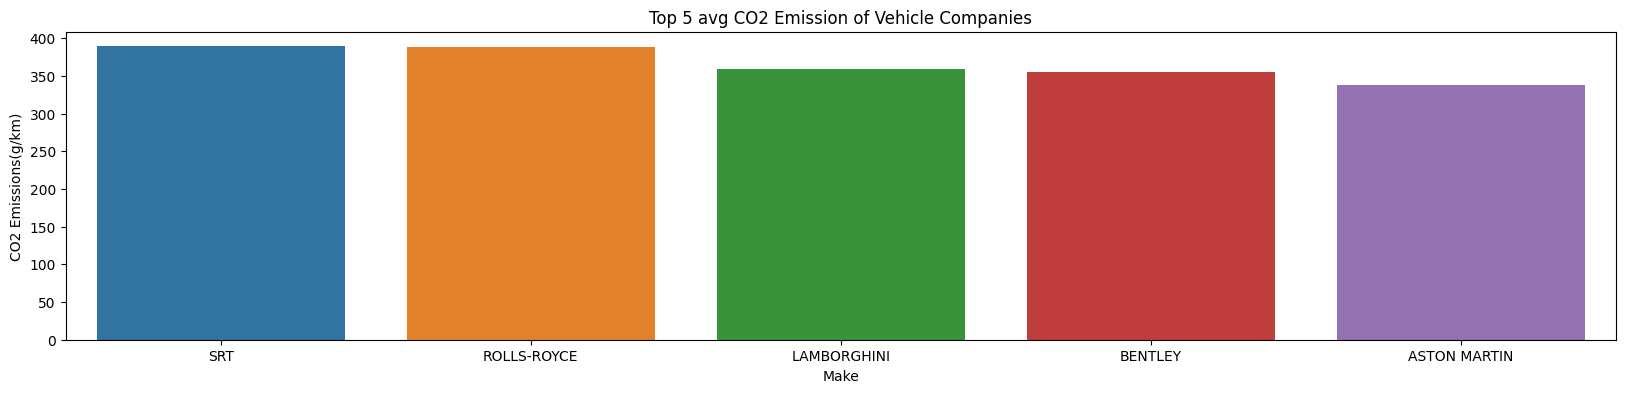

In [13]:
# lets check the avg CO2 emission of each categorical variables
plt.figure(figsize=(20, 4))
CO2_make = data_new.groupby(['Make'])['CO2 Emissions(g/km)'].mean().sort_values().reset_index().nlargest(5,'CO2 Emissions(g/km)')
sns.barplot(data=CO2_make,x="Make",y="CO2 Emissions(g/km)")
plt.title("Top 5 avg CO2 Emission of Vehicle Companies")
plt.show()


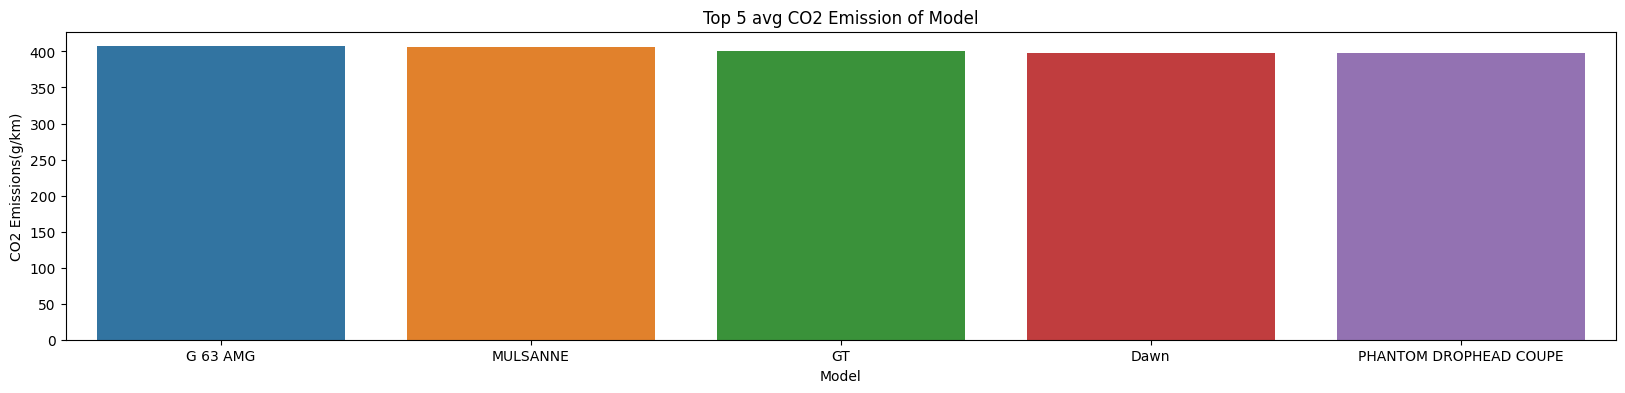

In [14]:
plt.figure(figsize=(20, 4))
CO2_model = data_new.groupby(['Model'])['CO2 Emissions(g/km)'].mean().sort_values().reset_index().nlargest(5,'CO2 Emissions(g/km)')
sns.barplot(data=CO2_model,x="Model",y="CO2 Emissions(g/km)")
plt.title("Top 5 avg CO2 Emission of Model")
plt.show()

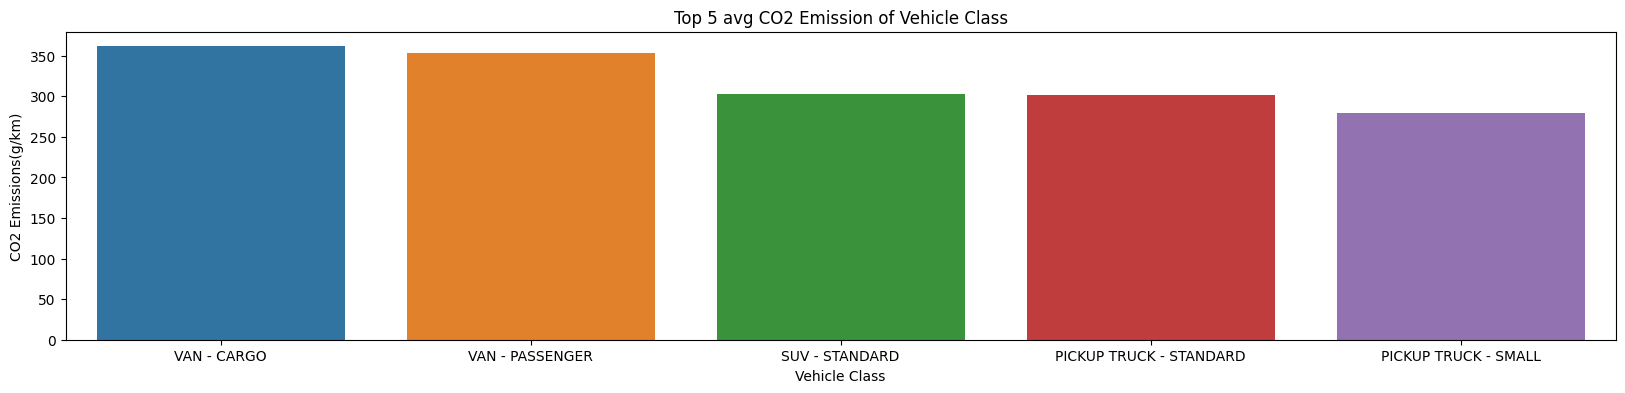

In [15]:
CO2_VehicleClass = data_new.groupby(['Vehicle Class'])['CO2 Emissions(g/km)'].mean().sort_values().reset_index().nlargest(5,'CO2 Emissions(g/km)')
plt.figure(figsize=(20, 4))
sns.barplot(data=CO2_VehicleClass,x="Vehicle Class",y="CO2 Emissions(g/km)")
plt.title("Top 5 avg CO2 Emission of Vehicle Class")
plt.show()

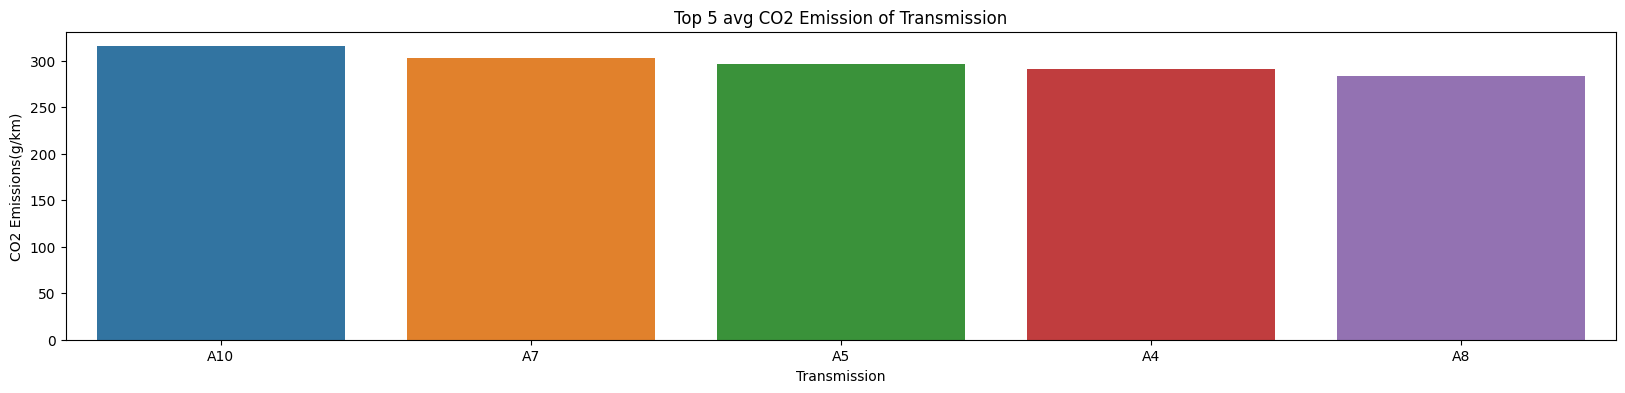

In [16]:
CO2_Transmission = data_new.groupby(['Transmission'])['CO2 Emissions(g/km)'].mean().sort_values().reset_index().nlargest(5,'CO2 Emissions(g/km)')
plt.figure(figsize=(20, 4))
sns.barplot(data=CO2_Transmission,x="Transmission",y="CO2 Emissions(g/km)")
plt.title("Top 5 avg CO2 Emission of Transmission")
plt.show()

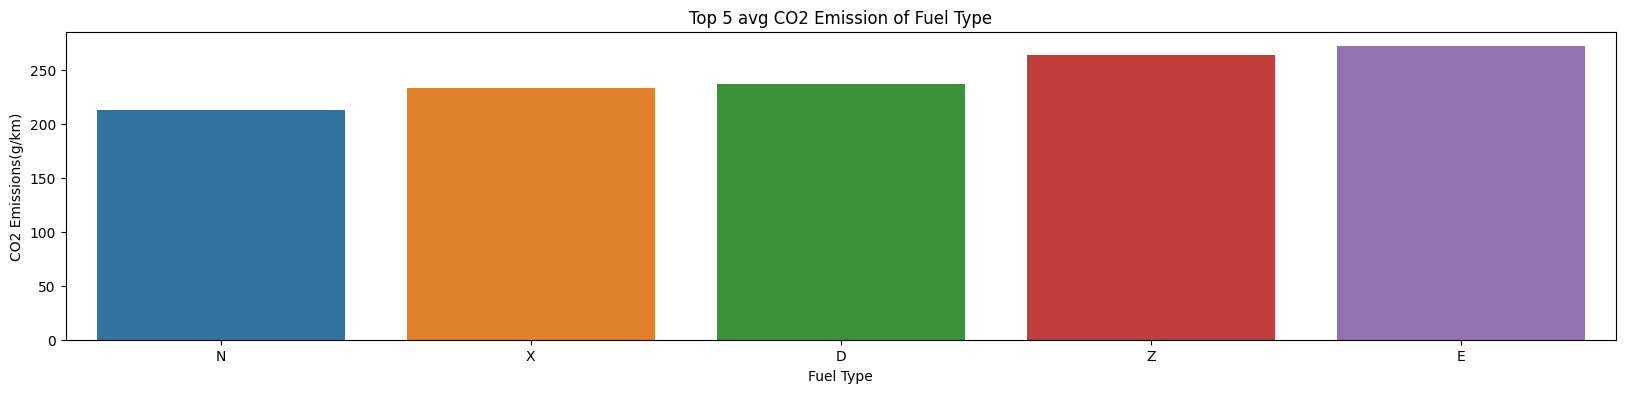

In [17]:
CO2_FuelType = data_new.groupby(['Fuel Type'])['CO2 Emissions(g/km)'].mean().sort_values().reset_index()
plt.figure(figsize=(20, 4))
sns.barplot(data=CO2_FuelType,x="Fuel Type",y="CO2 Emissions(g/km)")
plt.title("Top 5 avg CO2 Emission of Fuel Type")
plt.show()

* From the above categorical variable analysis we have identified top 5 avg CO2 emission of companies, models,vehicle class, transmission, fuel type.

# 4. Data Modelling and Evaluation

In this dataset the outcome variable is 'CO2 Emission' which is a continuous dependent variable. Here we will try to estimate the linear relationship between 'CO2 Emission' and all other independent variables.

**Linear Regression**

In [18]:
# load sci-kit learn functions for constructing logistic regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
# Save x & y variables
y=data_new['CO2 Emissions(g/km)']
x=data_new[numerical_columns].drop('CO2 Emissions(g/km)',axis=1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

In [19]:
# Build regression model
LR=LinearRegression()
# Fit the model
LR.fit(x_train,y_train)

#Predict the model
y_LR = LR.predict(x_test)

#Evaluate the model R² score (Coefficient of Determination) on the test set
LR_score=r2_score(y_test,y_LR)
print('Coefficient of Determination',LR_score)

#Mean absolute error
LR_mae=mean_absolute_error(y_test,y_LR)
print('Mean absolute error',LR_mae)

#Mean squared error
LR_mae=mean_squared_error(y_test,y_LR)
print('Mean squared error',LR_mae)

Coefficient of Determination 0.9076612248806428
Mean absolute error 11.065884916190562
Mean squared error 277.407148322835


**Decission Tree**

In [20]:
from sklearn.tree import DecisionTreeRegressor
#specify the model. 
DT = DecisionTreeRegressor(random_state=0)

# Fit the model
DT.fit(x_train,y_train)

#Predict the model
y_DT = DT.predict(x_test)


#Evaluate the model R² score (Coefficient of Determination) on the test set
DT_score=r2_score(y_test,y_DT)
print('Coefficient of Determination',DT_score)

#Mean absolute error
DT_mae=mean_absolute_error(y_test,y_DT)
print('Mean absolute error',DT_mae)

#Mean squared error
DT_mae=mean_squared_error(y_test,y_DT)
print('Mean squared error',DT_mae)

Coefficient of Determination 0.9782837016064998
Mean absolute error 2.401837489862124
Mean squared error 65.24080920156992


**Random Forest**

In [21]:
from sklearn.ensemble import RandomForestRegressor
#specify the model. 
RF = RandomForestRegressor(random_state=0)

# Fit the model
RF.fit(x_train,y_train)

#Predict the model
y_RF = RF.predict(x_test)


#Evaluate the model R² score (Coefficient of Determination) on the test set
RF_score=r2_score(y_test,y_RF)
print('Coefficient of Determination',RF_score)

#Mean absolute error
RF_mae=mean_absolute_error(y_test,y_RF)
print('Mean absolute error',RF_mae)

#Mean squared error
RF_mae=mean_squared_error(y_test,y_RF)
print('Mean squared error',RF_mae)

Coefficient of Determination 0.9841628886233843
Mean absolute error 2.631518644294538
Mean squared error 47.578364549229335


**Finding**

We have applied 3 models Linear Regression,Decision Tree Regressor,RandomForest Regressor

As we can see random forest has performed best (with accuracy ~ 0.98)

Hence, We can say that our model is good enough to predict the CO2 Emission using above variables.

**Feature Selection**

Now we will evaluate the difference in the efficiency of CO2 emissions model when Fuel Consumption for City and Highway are considered separately and when their weighted variable interaction is considered

In [22]:
data_cthw=data_new[numerical_columns].drop('Fuel Consumption Comb (L/100 km)',axis=1)

Apply RandomForest

In [23]:
y=data_cthw['CO2 Emissions(g/km)']
x=data_cthw.drop('CO2 Emissions(g/km)',axis=1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

In [24]:
RF1 = RandomForestRegressor(random_state=0)
# Fit the model
RF1.fit(x_train,y_train)

#Predict the model
y_RF1 = RF1.predict(x_test)


#Evaluate the model R² score (Coefficient of Determination) on the test set
RF1_score=r2_score(y_test,y_RF1)
print('Coefficient of Determination',RF1_score)

#Mean absolute error
RF1_mae=mean_absolute_error(y_test,y_RF1)
print('Mean absolute error',RF1_mae)

#Mean squared error
RF1_mae=mean_squared_error(y_test,y_RF1)
print('Mean squared error',RF1_mae)

Coefficient of Determination 0.9842385191230592
Mean absolute error 2.7071666829231535
Mean squared error 47.351152944852906


In [25]:
data_comb=data_new[numerical_columns].drop(['Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)'],axis=1)

Apply RandomForest

In [26]:
y=data_comb['CO2 Emissions(g/km)']
x=data_comb.drop('CO2 Emissions(g/km)',axis=1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

In [27]:
RF2 = RandomForestRegressor(random_state=0)
# Fit the model
RF2.fit(x_train,y_train)

#Predict the model
y_RF2 = RF2.predict(x_test)


#Evaluate the model R² score (Coefficient of Determination) on the test set
RF2_score=r2_score(y_test,y_RF2)
print('Coefficient of Determination',RF2_score)

#Mean absolute error
RF2_mae=mean_absolute_error(y_test,y_RF2)
print('Mean absolute error',RF2_mae)

#Mean squared error
RF2_mae=mean_squared_error(y_test,y_RF2)
print('Mean squared error',RF2_mae)

Coefficient of Determination 0.9837130309556344
Mean absolute error 3.1686714133244447
Mean squared error 48.92984157066855


**Finding**

* R2 is higher when we worked on the City and Highway data compare to Comb data
* MSE & MAE are less when we worked on the City and Highway data compare to Comb data

Hence our model works differently when we consider the above two scenario.